## Introduction

The OASIS Longitudinal dataset focuses on brain aging and dementia in older adults. It contains data from 150 participants aged 60 to 96 years, each with two or more visits approximately one year apart, totaling 373 sessions. For each visit, the dataset includes age, gender, education, socioeconomic status, and several brain and cognitive measures such as the Mini-Mental State Examination (MMSE), Clinical Dementia Rating (CDR), normalized Whole Brain Volume (nWBV), and estimated Total Intracranial Volume (eTIV). The “Group” column indicates whether a participant was demented or nondemented at that time, including participants who remained healthy, those who were demented from the start, and those who developed dementia over time. The one-year gap between visits allows the study of changes in brain structure and cognitive function, providing insight into normal aging, dementia progression, and early signs of Alzheimer’s disease.

**Key Fields**:

- **Subject ID**: Unique identifier for each participant.

- **MRI ID**: Unique identifier for each MRI session.

- **Group**: Clinical group at the time of visit — Demented or Nondemented.

- **Visit**: Visit number indicating session order.

- **MR Delay**: Days since the participant’s first scan.

- **M/F**: Biological sex — Male (M) or Female (F).

- **Hand**: Handedness — Right or Left.

- **Age**: Age in years at each visit.

- **EDUC**: Total years of formal education.

- **SES**: Socioeconomic status rating.

- **MMSE**: Mini-Mental State Examination score (0–30).

- **CDR**: Clinical Dementia Rating (0–3).

- **eTIV**: Estimated Total Intracranial Volume (cubic millimeters).

- **nWBV**: Normalized Whole Brain Volume (ratio of brain size to intracranial volume).

- **ASF**: Atlas Scaling Factor used in MRI image normalization.

**Dataset Description**:

This combination of demographic, cognitive, and neuroimaging measures supports both cross-sectional and longitudinal analyses of aging and dementia. It enables the study of:

- Baseline differences between healthy and demented individuals

- Yearly decline in memory (MMSE) and brain volume (nWBV)

- Effects of gender, education, and age on cognitive health

- Disease progression through converters (participants who develop dementia over time)

The mix of static attributes (Age, Sex, Education) and dynamic measures (MMSE, nWBV, CDR) makes this dataset suitable for classification tasks (predicting dementia status) and time-series analyses (tracking changes over visits).

**Importing the data**

In [1]:
import pandas as pd

df = pd.read_csv("../datasets/oasis-data.csv")
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


## Data Exploration

In [3]:
# Import libraries
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#### Descriptive Statistics

In [4]:
# Get basic statistics of the dataframe
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
# Get the shape of the dataframe
print(df.shape)

(373, 15)


#### Handling missing values

In [6]:
# Check for missing values in each column
for col in df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df[col].isnull().sum()/df[col].shape[0]))
    print(msg)

column: Subject ID	 Percent of NaN value: 0.00%
column:     MRI ID	 Percent of NaN value: 0.00%
column:      Group	 Percent of NaN value: 0.00%
column:      Visit	 Percent of NaN value: 0.00%
column:   MR Delay	 Percent of NaN value: 0.00%
column:        M/F	 Percent of NaN value: 0.00%
column:       Hand	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 0.00%
column:       EDUC	 Percent of NaN value: 0.00%
column:        SES	 Percent of NaN value: 5.09%
column:       MMSE	 Percent of NaN value: 0.54%
column:        CDR	 Percent of NaN value: 0.00%
column:       eTIV	 Percent of NaN value: 0.00%
column:       nWBV	 Percent of NaN value: 0.00%
column:        ASF	 Percent of NaN value: 0.00%


As an initial step, the proportion of missing values in each feature is visualized using a bar chart to provide a clear overview of data completeness.

<Axes: >

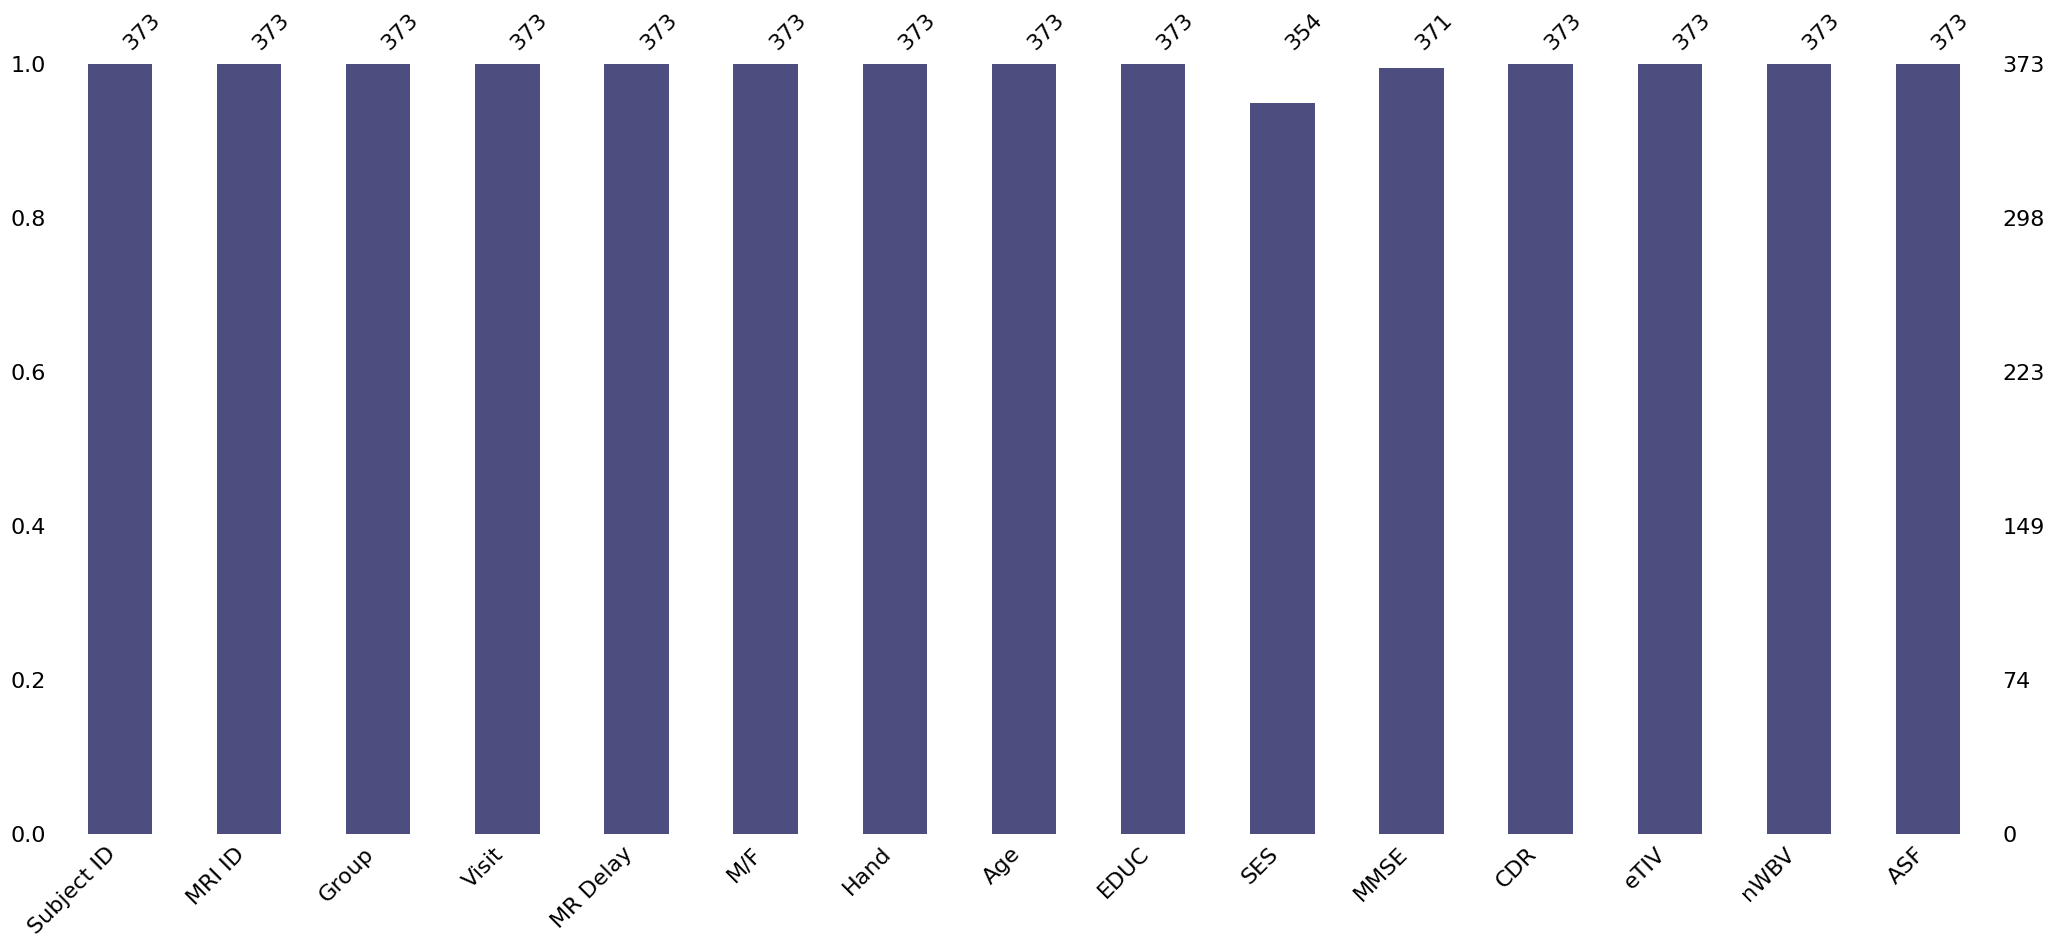

In [7]:
# Visualize missing values using missingno
import missingno as msno

msno.bar(df, color=(0.3,0.3,0.5))

An initial assessment of missing values shows that the dataset is largely complete. All key identifiers and demographic variables, including Subject ID, MRI ID, Group, Visit, MR Delay, M/F, Hand, Age, EDUC, CDR, eTIV, nWBV, and ASF, have no missing values. Minor missingness is observed in SES (5.09%) and MMSE (0.54%), while all other variables are fully populated. Given the very low proportion of missing data, no imputation or other missing data handling is performed, and analyses proceed using the available values.

#### First Visit Data (Baseline)

The first visit data represents each participant at baseline, capturing their initial cognitive and neuroimaging measures before any longitudinal changes occur. By focusing on this single time point per individual, we can examine how demographic factors, cognitive performance, and brain structure differ across clinical groups — including nondemented (ND), demented (D), and converters who develop dementia over time. This baseline assessment allows us to explore relationships between age, MMSE, CDR, nWBV, education, and socioeconomic status, as well as potential differences between males and females. Summary statistics, correlation analyses, and visualizations such as boxplots, histograms, scatterplots, and gender distribution charts provide a clear overview of group differences at the start of the study.

In [8]:
# --- Filter for Baseline (Visit = 1) ---
df1 = df[df['Visit'] == 1]

# --- Basic Overview ---
print("\nMissing values:\n", df1.isna().sum())
print("\nSummary statistics:\n", df1.describe(include='all'))


Missing values:
 Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

Summary statistics:
        Subject ID         MRI ID        Group  Visit  MR Delay  M/F Hand  \
count         150            150          150  150.0     150.0  150  150   
unique        150            150            3    NaN       NaN    2    1   
top     OAS2_0001  OAS2_0001_MR1  Nondemented    NaN       NaN    F    R   
freq            1              1           72    NaN       NaN   88  150   
mean          NaN            NaN          NaN    1.0       0.0  NaN  NaN   
std           NaN            NaN          NaN    0.0       0.0  NaN  NaN   
min           NaN            NaN          NaN    1.0       0.0  NaN  NaN   
25%           NaN            NaN          NaN    1.0       0.0  NaN  NaN   
50%           NaN      

In [9]:
# --- 1️⃣ Group-wise summaries ---
group_summary = df1.groupby('Group')[['Age', 'MMSE', 'CDR', 'nWBV', 'EDUC', 'SES']].describe()
print("\nGroup-wise Summary:\n", group_summary)


Group-wise Summary:
               Age                                                      MMSE  \
            count       mean       std   min   25%   50%    75%   max count   
Group                                                                         
Converted    14.0  77.071429  7.690797  65.0  69.5  78.5  83.75  87.0  14.0   
Demented     64.0  75.109375  6.735637  61.0  70.0  75.0  80.00  96.0  64.0   
Nondemented  72.0  75.430556  8.232239  60.0  69.0  75.0  81.00  93.0  72.0   

                        ...  EDUC         SES                                \
                  mean  ...   75%   max count      mean       std  min  25%   
Group                   ...                                                   
Converted    29.357143  ...  16.0  20.0  14.0  1.857143  1.027105  1.0  1.0   
Demented     25.328125  ...  16.0  20.0  56.0  2.750000  1.179368  1.0  2.0   
Nondemented  29.194444  ...  18.0  23.0  72.0  2.416667  1.058167  1.0  2.0   

                            

In [10]:
# --- 2️⃣ Gender differences ---
gender_summary = df1.groupby('M/F')[['Age', 'MMSE', 'nWBV', 'CDR']].mean()
print("\nGender Differences:\n", gender_summary)


Gender Differences:
            Age       MMSE      nWBV       CDR
M/F                                          
F    75.840909  28.102273  0.743443  0.204545
M    74.887097  26.790323  0.725613  0.338710



Correlation matrix:
            Age      MMSE      nWBV
Age   1.000000  0.055612 -0.518359
MMSE  0.055612  1.000000  0.341912
nWBV -0.518359  0.341912  1.000000


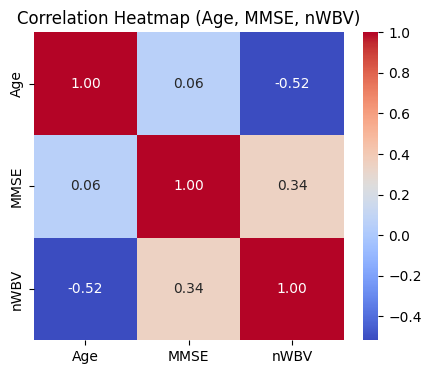

In [11]:
# --- 3️⃣ Correlations ---
corr_vars = ['Age', 'MMSE', 'nWBV']
corr_matrix = df[corr_vars].corr()
print("\nCorrelation matrix:\n", corr_matrix)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Age, MMSE, nWBV)")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_14360\4283046576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='MMSE', palette="Set2")
C:\Users\Acer\AppData\Local\Temp\ipykernel_14360\4283046576.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='nWBV', palette="Set3")


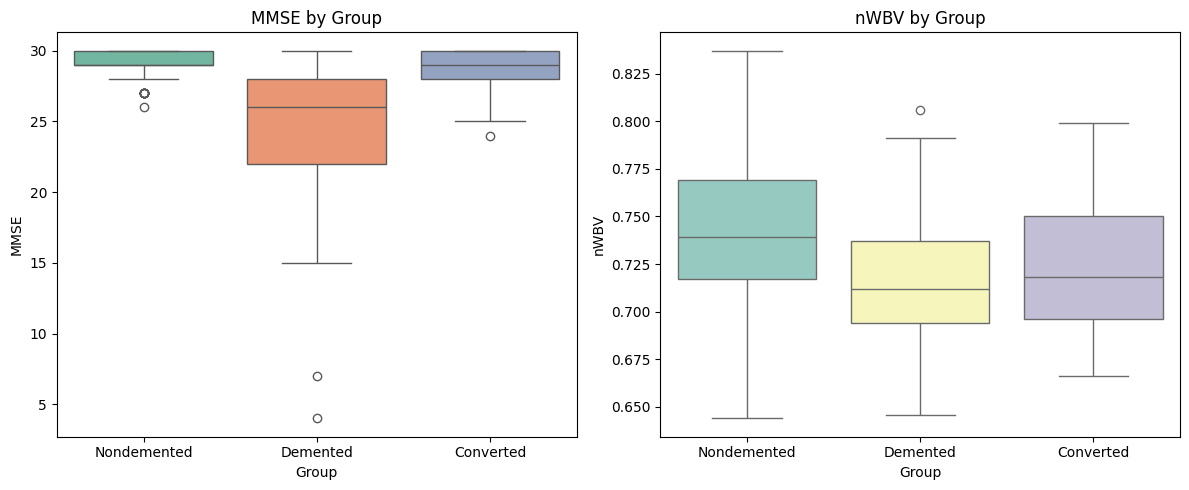

In [12]:
# --- 4️⃣ Boxplots: MMSE & nWBV by Group ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Group', y='MMSE', palette="Set2")
plt.title("MMSE by Group")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Group', y='nWBV', palette="Set3")
plt.title("nWBV by Group")
plt.tight_layout()
plt.show()

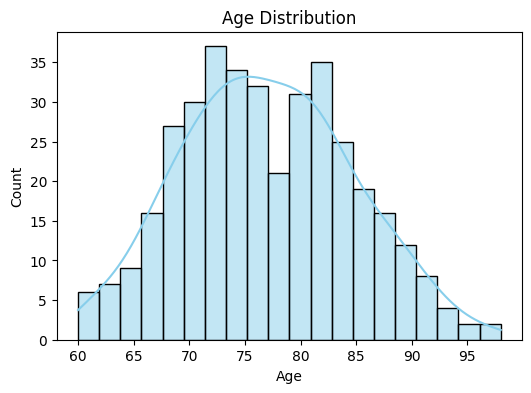

In [13]:
# --- 5️⃣ Histogram: Age Distribution ---
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

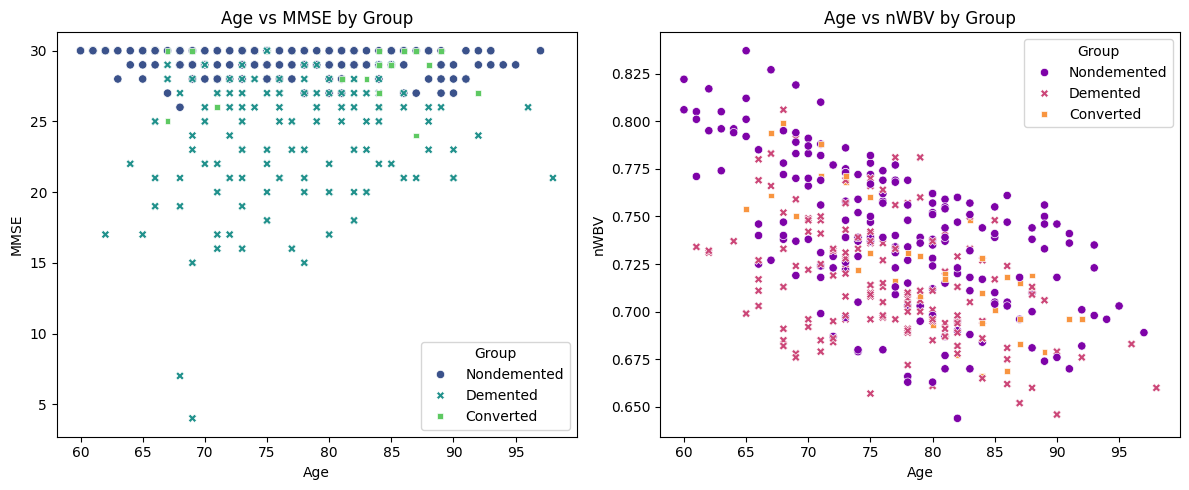

In [14]:
# --- 6️⃣ Scatter Plots ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Age', y='MMSE', hue='Group', style='Group', palette='viridis')
plt.title("Age vs MMSE by Group")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Age', y='nWBV', hue='Group', style='Group', palette='plasma')
plt.title("Age vs nWBV by Group")
plt.tight_layout()
plt.show()

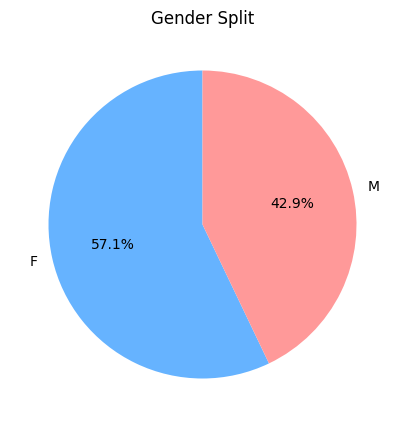

In [15]:
# --- 7️⃣ Gender Split ---
plt.figure(figsize=(5, 5))
gender_counts = df['M/F'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Gender Split")
plt.show()

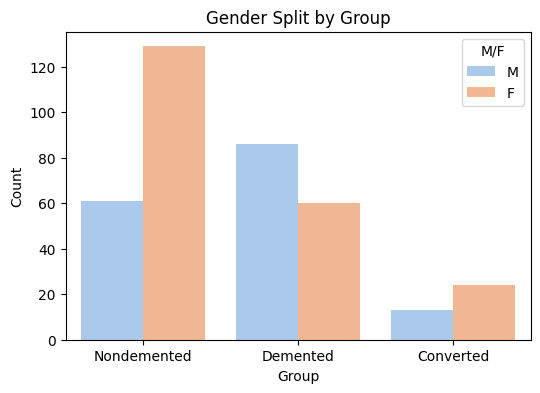

In [16]:
# --- 8️⃣ Bar chart for gender split by group ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Group', hue='M/F', palette='pastel')
plt.title("Gender Split by Group")
plt.ylabel("Count")
plt.show()

#### All Visits Combined (Longitudinal Data)

The longitudinal dataset includes all visits for every participant, providing a time series view of cognitive and brain changes over multiple years. By analyzing repeated measures, we can investigate how MMSE scores and normalized whole brain volume (nWBV) evolve over time, identify trends associated with age or clinical group, and quantify the rate of decline for each group. Visualizing individual trajectories alongside group-level averages allows for a clear understanding of both subject-specific patterns and overall progression. This approach is particularly valuable for studying the dynamics of dementia development and assessing how cognitive and structural brain changes unfold across different participant groups.

In [17]:
# --- Compute Time Variable ---
# MR Delay is in days since first visit → convert to years
df['Years'] = df['MR Delay'] / 365.25

# --- Check basic structure ---
print(df[['Subject ID', 'Visit', 'Group', 'Years', 'MMSE', 'nWBV']].head())

  Subject ID  Visit        Group     Years  MMSE   nWBV
0  OAS2_0001      1  Nondemented  0.000000  27.0  0.696
1  OAS2_0001      2  Nondemented  1.251198  30.0  0.681
2  OAS2_0002      1     Demented  0.000000  23.0  0.736
3  OAS2_0002      2     Demented  1.533196  28.0  0.713
4  OAS2_0002      3     Demented  5.188227  22.0  0.701


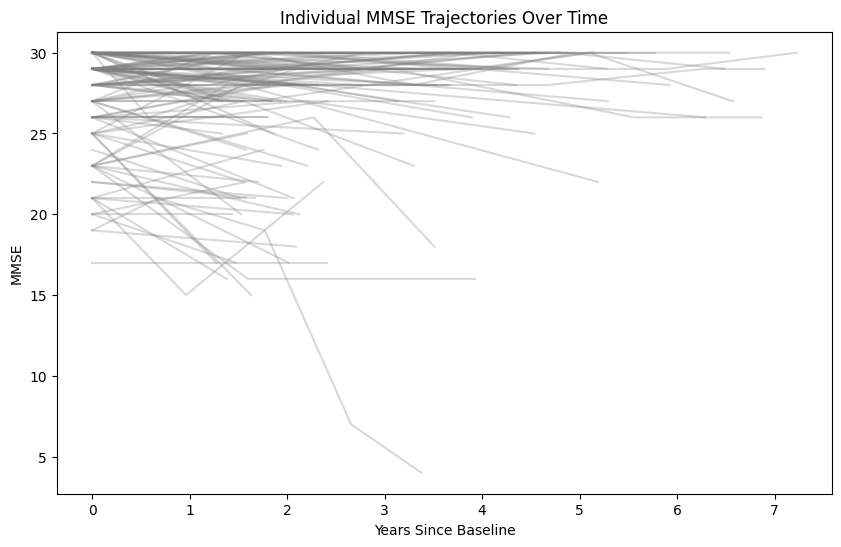

In [18]:
# --- 1️⃣ Plot: MMSE Trajectories per Subject ---
plt.figure(figsize=(10, 6))
for sid, data in df.groupby('Subject ID'):
    plt.plot(data['Years'], data['MMSE'], color='gray', alpha=0.3)
plt.title("Individual MMSE Trajectories Over Time")
plt.xlabel("Years Since Baseline")
plt.ylabel("MMSE")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_14360\4206866611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='Years', y='MMSE', hue='Group', ci='sd', estimator='mean', lw=2)


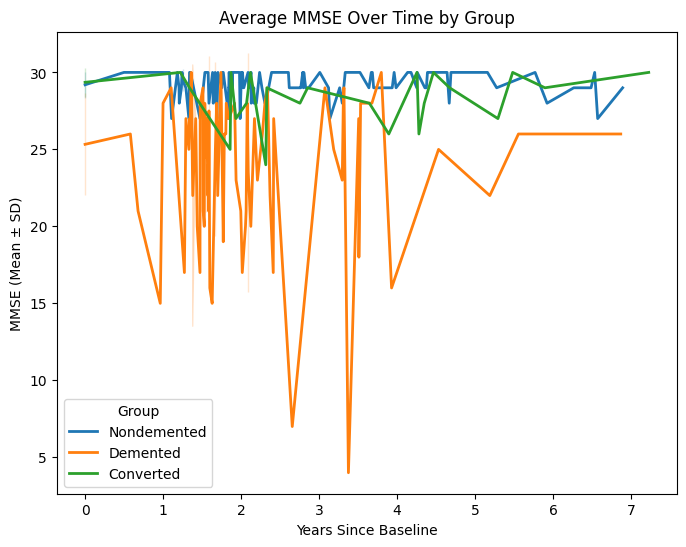

In [19]:
# --- 2️⃣ Smoothed Average Line per Group ---
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Years', y='MMSE', hue='Group', ci='sd', estimator='mean', lw=2)
plt.title("Average MMSE Over Time by Group")
plt.xlabel("Years Since Baseline")
plt.ylabel("MMSE (Mean ± SD)")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_14360\1056325570.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='Years', y='nWBV', hue='Group', ci='sd', estimator='mean', lw=2)


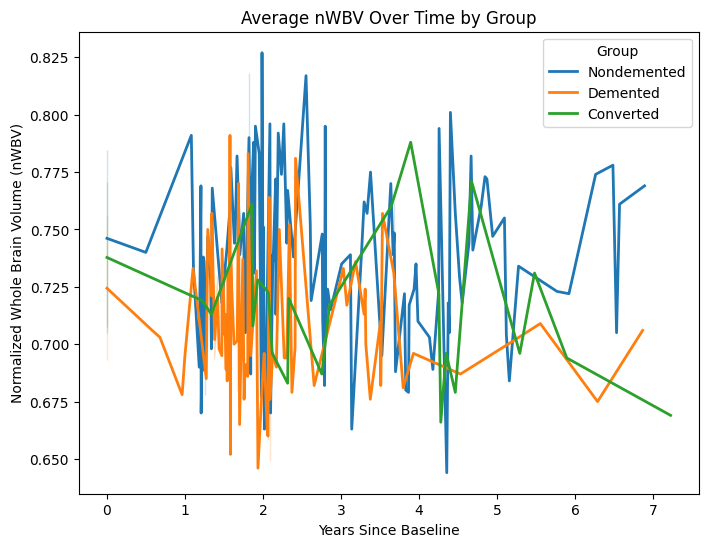

In [20]:
# --- 3️⃣ nWBV Trend by Group ---
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Years', y='nWBV', hue='Group', ci='sd', estimator='mean', lw=2)
plt.title("Average nWBV Over Time by Group")
plt.xlabel("Years Since Baseline")
plt.ylabel("Normalized Whole Brain Volume (nWBV)")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_14360\47890190.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='MMSE_rate', palette='coolwarm')


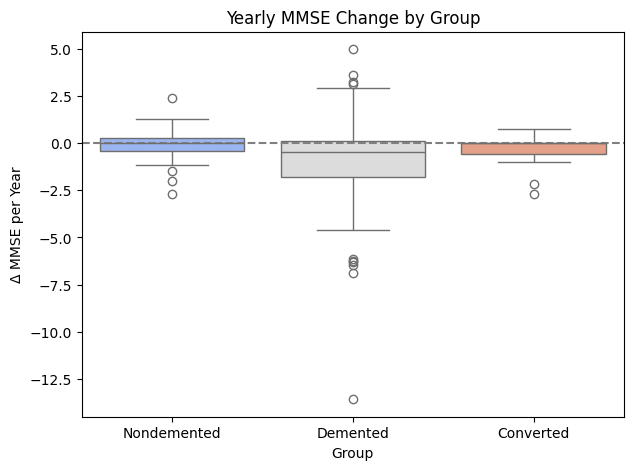

In [21]:
# --- 4️⃣ Compute Yearly Change in MMSE ---
df = df.sort_values(by=['Subject ID', 'Years'])
df['MMSE_change'] = df.groupby('Subject ID')['MMSE'].diff()
df['Year_diff'] = df.groupby('Subject ID')['Years'].diff()
df['MMSE_rate'] = df['MMSE_change'] / df['Year_diff']

# --- Boxplot of Yearly MMSE Change by Group ---
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Group', y='MMSE_rate', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Yearly MMSE Change by Group")
plt.ylabel("Δ MMSE per Year")
plt.show()

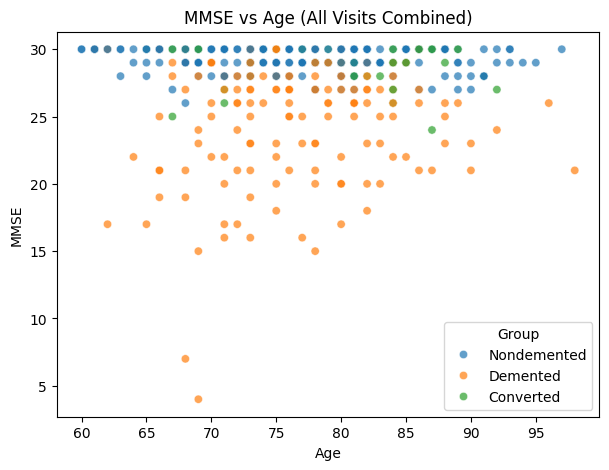

In [22]:
# --- 5️⃣ Correlation with Age ---
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Age', y='MMSE', hue='Group', alpha=0.7)
plt.title("MMSE vs Age (All Visits Combined)")
plt.xlabel("Age")
plt.ylabel("MMSE")
plt.show()

In [23]:
# --- Compute yearly changes per subject ---
df['MMSE_diff'] = df.groupby('Subject ID')['MMSE'].diff()
df['nWBV_diff'] = df.groupby('Subject ID')['nWBV'].diff()
df['Year_diff'] = df.groupby('Subject ID')['Years'].diff()

# Avoid division by zero or NaNs for first visit
df['MMSE_per_year'] = df['MMSE_diff'] / df['Year_diff']
df['nWBV_per_year'] = df['nWBV_diff'] / df['Year_diff']

# --- Compute subject-level averages ---
subject_summary = (
    df.groupby(['Subject ID', 'Group', 'M/F', 'EDUC'], as_index=False)
      .agg({
          'MMSE_per_year': 'mean',
          'nWBV_per_year': 'mean'
      })
)

print(subject_summary.head())

  Subject ID        Group M/F  EDUC  MMSE_per_year  nWBV_per_year
0  OAS2_0001  Nondemented   M    14       2.397702      -0.011989
1  OAS2_0002     Demented   M    12       0.809794      -0.009142
2  OAS2_0004  Nondemented   F    18      -0.678903       0.005431
3  OAS2_0005  Nondemented   M    12       0.488785      -0.002029
4  OAS2_0007     Demented   M    16      -0.352558      -0.011473


#### Change / Per-Year Data (Derived Data)

The per-year change dataset summarizes each participant’s average annual change in cognitive and brain measures, such as MMSE and nWBV. By condensing longitudinal data into per-subject rates of decline, this dataset enables direct comparisons of the speed of cognitive and structural brain changes across clinical groups. Analyses can explore differences by group, gender, or education level, as well as the relationship between changes in MMSE and nWBV. Visualizations including boxplots, scatterplots, and bar charts provide a clear view of how quickly each group is changing, offering valuable insight into the progression of dementia and patterns of brain aging.

In [24]:
# --- 1️⃣ Mean decline per group ---
group_means = subject_summary.groupby('Group')[['MMSE_per_year', 'nWBV_per_year']].mean()
print("\nMean annual changes per group:\n", group_means)


Mean annual changes per group:
              MMSE_per_year  nWBV_per_year
Group                                    
Converted        -0.584363      -0.005247
Demented         -0.801512      -0.006516
Nondemented      -0.043615      -0.003531


C:\Users\Acer\AppData\Local\Temp\ipykernel_14360\3840580836.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subject_summary, x='Group', y='MMSE_per_year', palette='coolwarm')
C:\Users\Acer\AppData\Local\Temp\ipykernel_14360\3840580836.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subject_summary, x='Group', y='nWBV_per_year', palette='viridis')


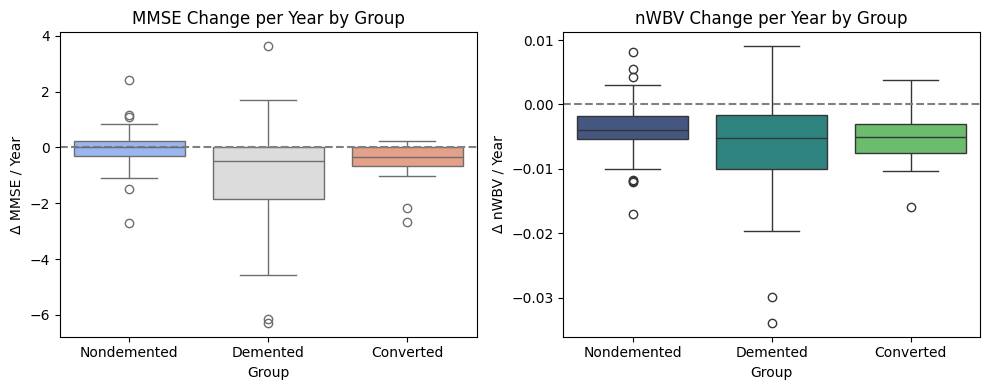

In [25]:
# --- 2️⃣ Compare decline by group (boxplots) ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=subject_summary, x='Group', y='MMSE_per_year', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title("MMSE Change per Year by Group")
plt.ylabel("Δ MMSE / Year")

plt.subplot(1, 2, 2)
sns.boxplot(data=subject_summary, x='Group', y='nWBV_per_year', palette='viridis')
plt.axhline(0, color='gray', linestyle='--')
plt.title("nWBV Change per Year by Group")
plt.ylabel("Δ nWBV / Year")
plt.tight_layout()
plt.show()


Correlation between MMSE change and nWBV change: 0.13


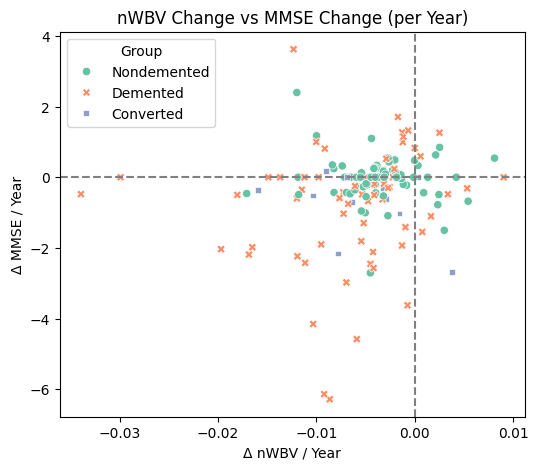

In [26]:
# --- 3️⃣ Correlation between MMSE and nWBV change ---
corr = subject_summary[['MMSE_per_year', 'nWBV_per_year']].corr().iloc[0, 1]
print(f"\nCorrelation between MMSE change and nWBV change: {corr:.2f}")

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=subject_summary,
    x='nWBV_per_year', y='MMSE_per_year', hue='Group', style='Group', palette='Set2'
)
plt.title("nWBV Change vs MMSE Change (per Year)")
plt.xlabel("Δ nWBV / Year")
plt.ylabel("Δ MMSE / Year")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

<Figure size 700x400 with 0 Axes>

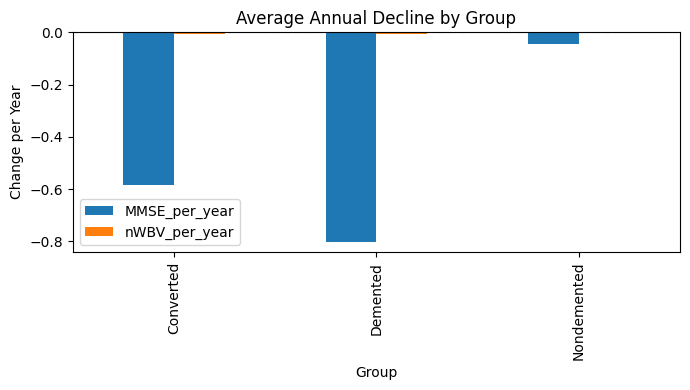

In [27]:
# --- 4️⃣ Average decline per group (bar chart) ---
plt.figure(figsize=(7, 4))
group_means.plot(kind='bar', figsize=(7,4))
plt.title("Average Annual Decline by Group")
plt.ylabel("Change per Year")
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="")
plt.tight_layout()
plt.show()

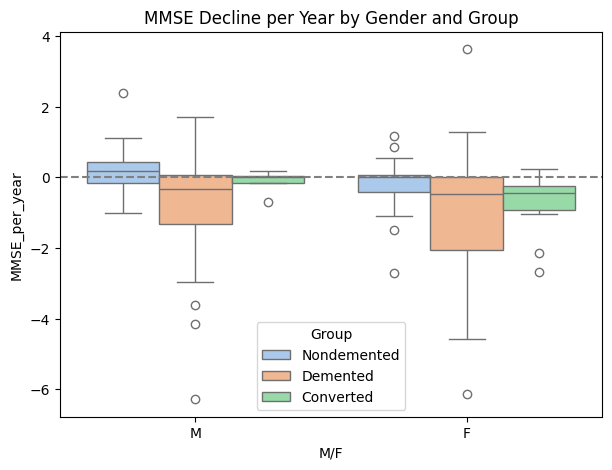

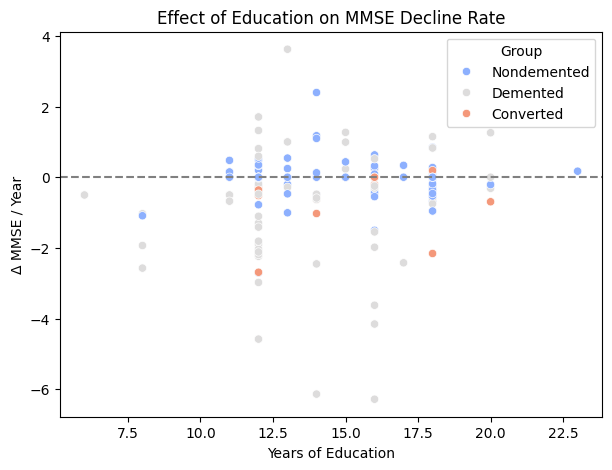

In [28]:
# --- 5️⃣ Compare by gender or education level ---
plt.figure(figsize=(7,5))
sns.boxplot(
    data=subject_summary,
    x='M/F', y='MMSE_per_year', hue='Group', palette='pastel'
)
plt.axhline(0, color='gray', linestyle='--')
plt.title("MMSE Decline per Year by Gender and Group")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=subject_summary,
    x='EDUC', y='MMSE_per_year', hue='Group', palette='coolwarm'
)
plt.title("Effect of Education on MMSE Decline Rate")
plt.xlabel("Years of Education")
plt.ylabel("Δ MMSE / Year")
plt.axhline(0, color='gray', linestyle='--')
plt.show()


#### Correlation Analysis and Interpretation

Correlation analysis provides a quantitative assessment of the relationships between cognitive, demographic, and neuroimaging variables in the dataset. By examining how measures such as MMSE, nWBV, age, education, and CDR are interrelated, we can identify which factors are most strongly associated with cognitive performance and brain structure. This analysis helps to uncover patterns that may indicate early signs of cognitive decline or differences between clinical groups. Both numeric correlation coefficients and visualizations, such as heatmaps or pairwise plots, are used to summarize these relationships and facilitate interpretation of the strength and direction of associations.

Correlation of MMSE with other numeric variables:

MMSE             1.000000
MMSE_rate        0.624165
MMSE_per_year    0.624165
MMSE_diff        0.603581
MMSE_change      0.603581
nWBV             0.341912
nWBV_per_year    0.298103
Year_diff        0.201643
nWBV_diff        0.196057
EDUC             0.194884
MR Delay         0.065844
Years            0.065844
Age              0.055612
ASF              0.040052
Visit           -0.029078
eTIV            -0.032084
SES             -0.149219
CDR             -0.686519
Name: MMSE, dtype: float64


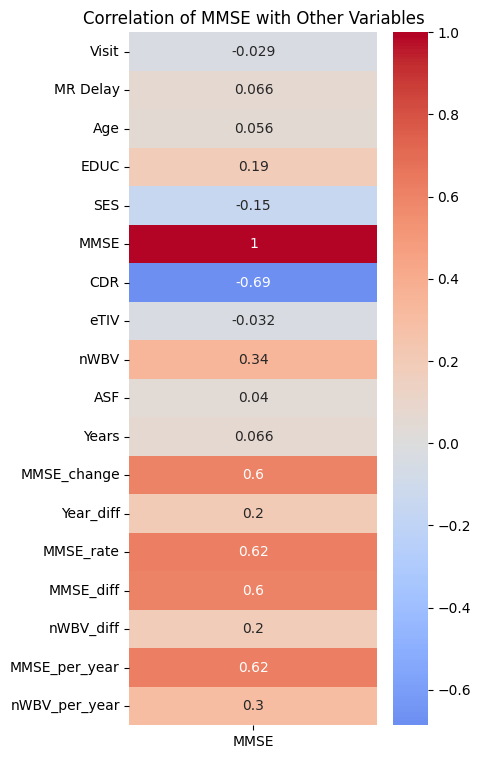

In [33]:
# --- Select numeric columns only ---
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# --- Compute correlation with MMSE ---
corr_with_mmse = df[numeric_cols].corr()['MMSE'].sort_values(ascending=False)
print("Correlation of MMSE with other numeric variables:\n")
print(corr_with_mmse)

# --- Optional: Heatmap of correlations with MMSE ---
# Only keep MMSE vs other numeric features
corr_df = df[numeric_cols].corr()[['MMSE']]

# Set up the matplotlib figure
plt.figure(figsize=(4, len(corr_df)*0.5))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of MMSE with Other Variables")
plt.show()

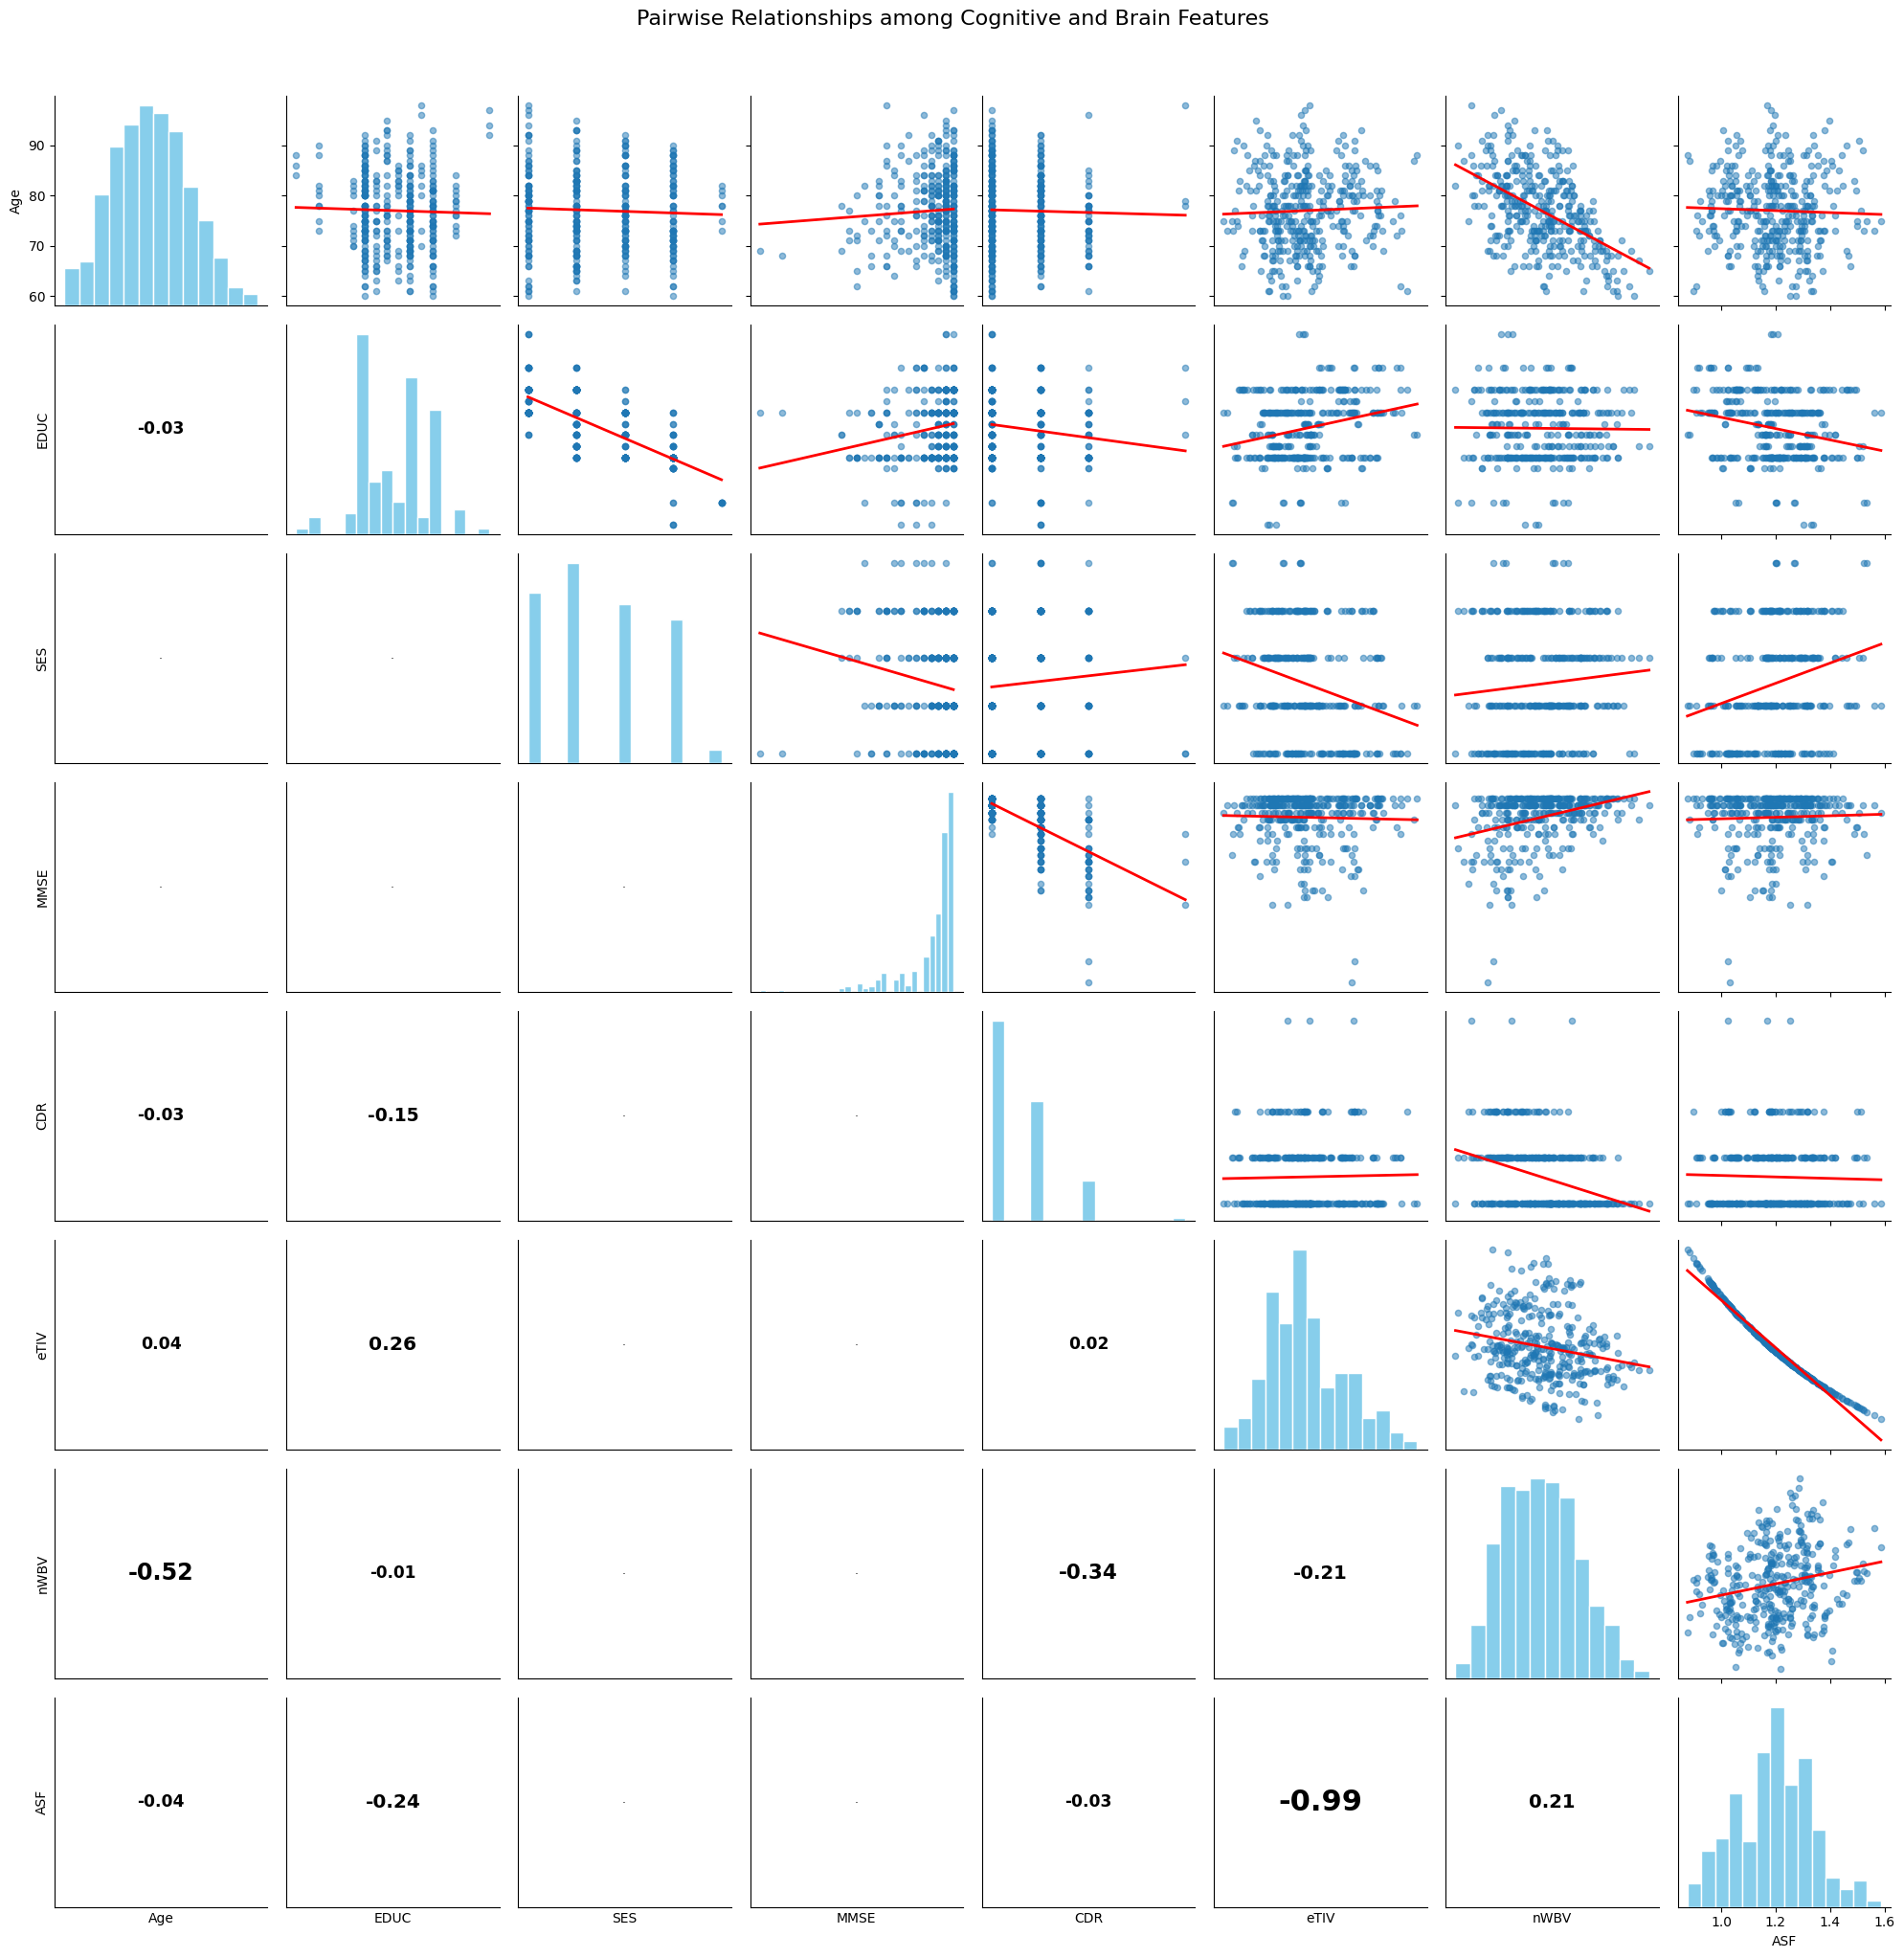

In [34]:
# --- Select numeric variables for pairwise analysis ---
numeric_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
d = df[numeric_cols]

# --- Custom panels ---
def diag_hist(x, color=None, **kws):
    ax = plt.gca()
    ax.hist(x, bins='auto', color='skyblue', edgecolor='white')
    ax.set_ylabel('Count', fontsize=10)

def lower_corr(x, y, **kws):
    ax = plt.gca()
    r = np.corrcoef(x, y)[0, 1]
    txt = f"{r:.2f}"
    ax.annotate(txt, xy=(0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center', fontsize=12 + 10*abs(r), fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])

def upper_smooth(x, y, color=None, **kws):
    ax = plt.gca()
    sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5, 's':20}, 
                line_kws={'linewidth':2, 'color':'red'}, ci=None, ax=ax)

# --- Create PairGrid ---
g = sns.PairGrid(d, diag_sharey=False)
g.map_diag(diag_hist)
g.map_lower(lower_corr)
g.map_upper(upper_smooth)

plt.suptitle("Pairwise Relationships among Cognitive and Brain Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


The correlation analysis shows how MMSE relates to other numeric variables in the dataset. As expected, MMSE is strongly negatively correlated with CDR (-0.69), reflecting that higher dementia severity (CDR) is associated with lower cognitive performance. MMSE is also moderately positively correlated with derived measures of cognitive change, including MMSE_rate and MMSE_per_year (~0.62) and MMSE_diff/MMSE_change (~0.60), indicating that individuals with higher baseline MMSE scores tend to decline more slowly or have larger changes over time.

Among neuroimaging measures, MMSE shows a weak to moderate positive correlation with nWBV (0.34) and nWBV_per_year (0.30), suggesting that higher brain volume is associated with better cognitive performance. Age, years since baseline, and MR delay have very small correlations with MMSE (0.05–0.07), indicating minimal association at baseline. Education (EDUC) shows a small positive correlation (0.19), consistent with the cognitive reserve hypothesis. eTIV, ASF, and Visit number show negligible correlations with MMSE, while SES has a small negative correlation (-0.15), suggesting lower socioeconomic status may be modestly linked to lower MMSE scores.

In summary, MMSE is most strongly associated with dementia severity (CDR) and measures of cognitive change, moderately associated with brain volume (nWBV), and weakly related to age, education, or socioeconomic factors. These patterns support the expected relationships between cognitive performance, brain structure, and dementia progression.